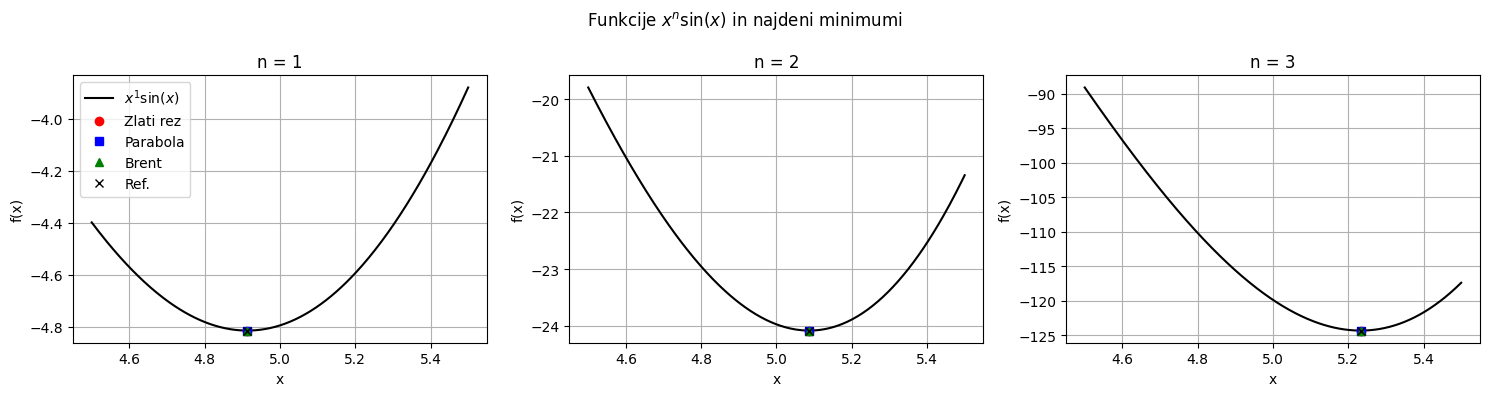

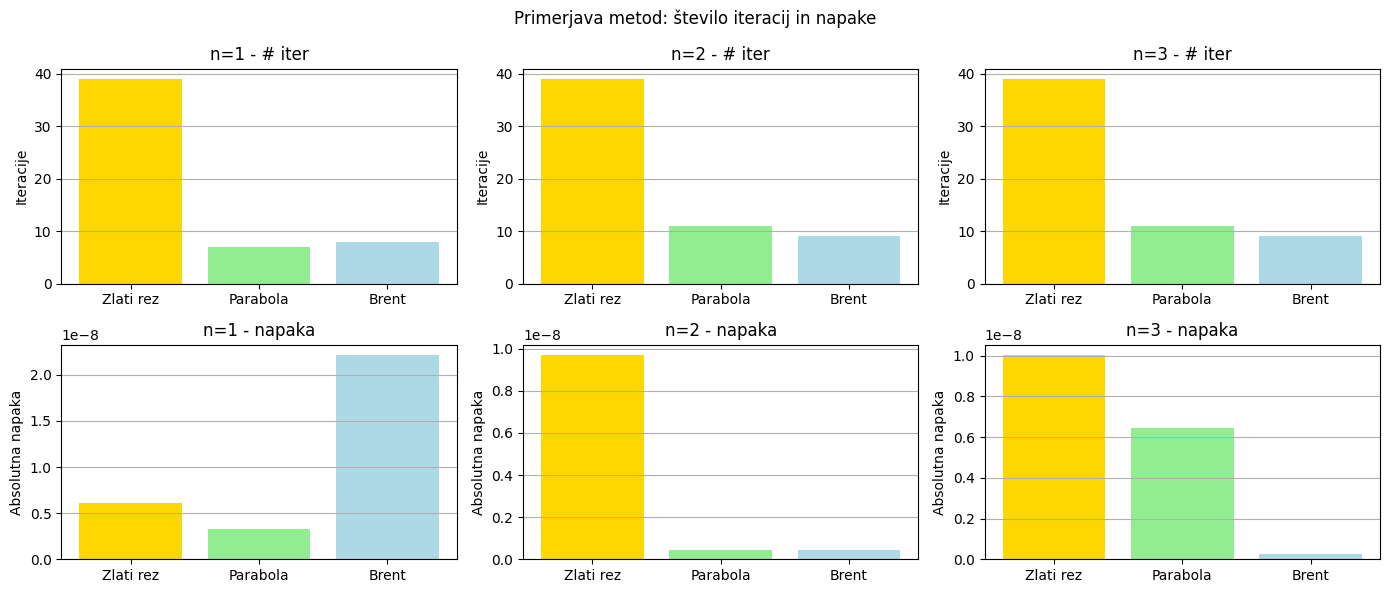

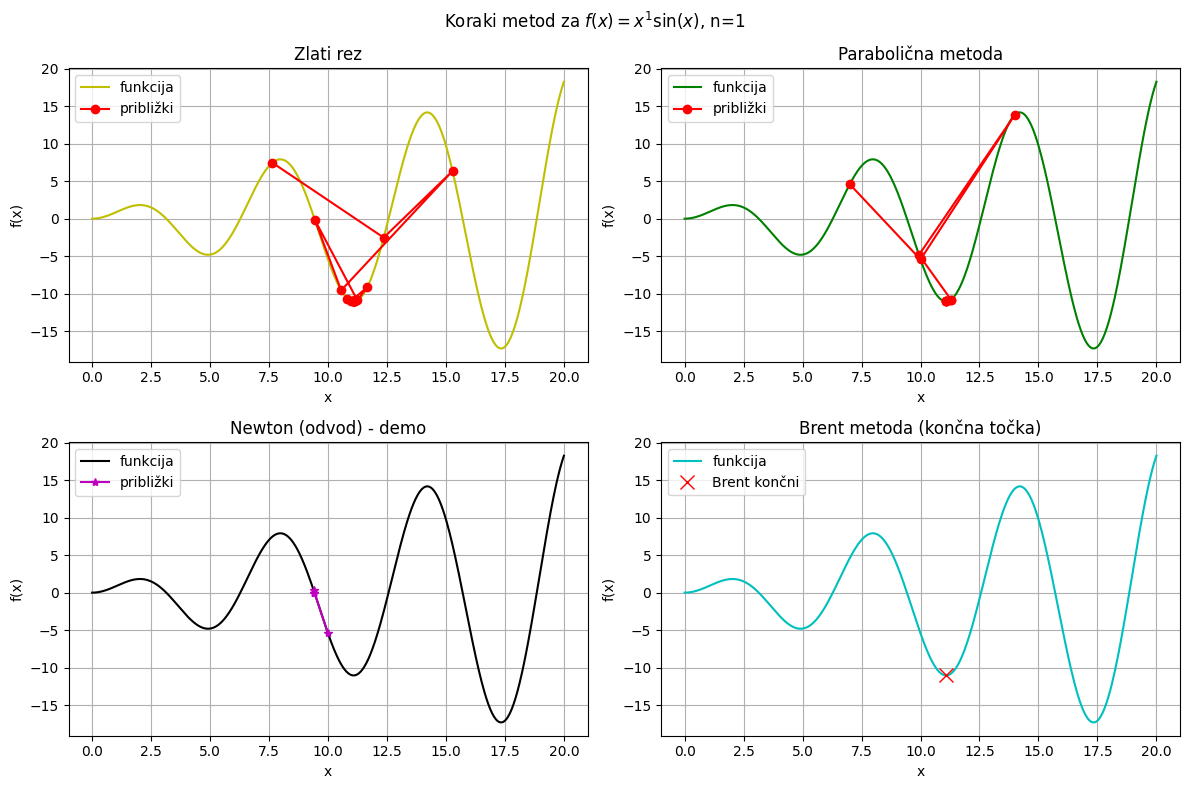

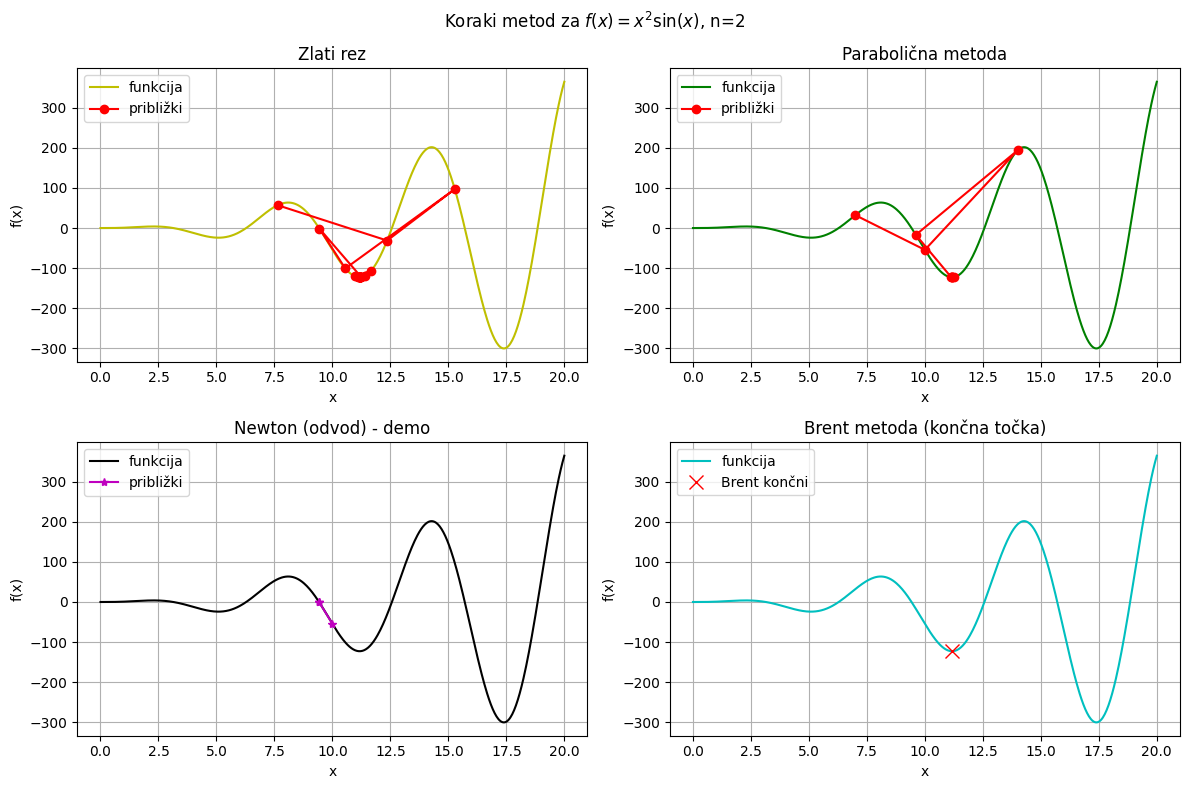

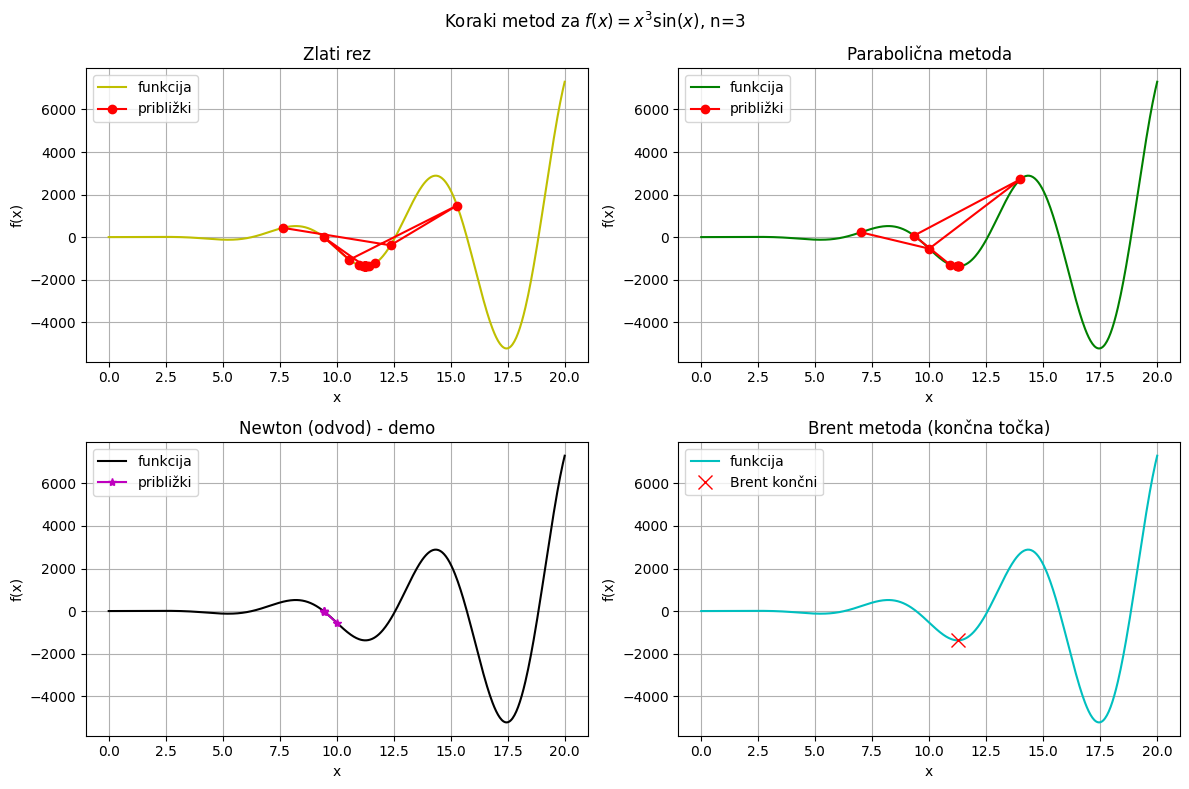

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar


def golden_section_search(f, a, b, tol=1e-8, max_iter=1000):
    phi = (1 + np.sqrt(5)) / 2  # zlati rez
    invphi = 1 / phi
    invphi2 = 1 / (phi**2)

    x1 = a + invphi2 * (b - a)
    x2 = a + invphi  * (b - a)
    f1, f2 = f(x1), f(x2)
    iterations = 0

    while (b - a) > tol and iterations < max_iter:
        if f1 < f2:
            b = x2
            x2 = x1
            f2 = f1
            x1 = a + invphi2 * (b - a)
            f1 = f(x1)
        else:
            a = x1
            x1 = x2
            f1 = f2
            x2 = a + invphi * (b - a)
            f2 = f(x2)
        iterations += 1

    x_min = 0.5*(a + b)
    return x_min, f(x_min), iterations

def parabolic_interpolation(f, a, b, c, tol=1e-8, max_iter=1000):
    iterations = 0
    for _ in range(max_iter):
        fa, fb, fc = f(a), f(b), f(c)
        denom = (b - a)*(fb - fc) - (b - c)*(fb - fa)
        if abs(denom) < 1e-16:
            break
        x = b - 0.5 * (
            ((b - a)**2*(fb - fc) - (b - c)**2*(fb - fa)) / denom
        )
        if abs(x - b) < tol:
            b = x
            break
        fx = f(x)
        if x < b:
            if fx < fb:
                c = b
                b = x
            else:
                a = x
        else:
            if fx < fb:
                a = b
                b = x
            else:
                c = x
        iterations += 1
    return b, f(b), iterations

def brent_method(f, a, b, c, tol=1e-8):
    res = minimize_scalar(f, bracket=(a, b, c), method='brent', tol=tol)
    iters = res.nit if hasattr(res, 'nit') else res.nfev
    return res.x, res.fun, iters


def df_n(x, n):
    return n*(x**(n-1))*np.sin(x) + (x**n)*np.cos(x)

def test_minimization_methods():
    ns = [1, 2, 3]
    a_init, c_init = 4.5, 5.5
    b_init = 5.0  # sredinska točka

    results = []  
    fig_funcs, axes_funcs = plt.subplots(1, 3, figsize=(15, 4))
    fig_funcs.suptitle("Funkcije $x^n \\sin(x)$ in najdeni minimumi")

    for idx, n in enumerate(ns):
        f_n = lambda x: (x**n)*np.sin(x)

        # referenca
        ref = minimize_scalar(f_n, bracket=(a_init, b_init, c_init), method='brent', tol=1e-14)
        x_true, f_true = ref.x, ref.fun

        # Zlati rez
        xg, fg, ig = golden_section_search(f_n, a_init, c_init, tol=1e-8)
        err_g = abs(xg - x_true)

        # Parabola
        xp, fp, ip = parabolic_interpolation(f_n, a_init, b_init, c_init, tol=1e-8)
        err_p = abs(xp - x_true)

        # Brent
        xbr, fbr, ibr = brent_method(f_n, a_init, b_init, c_init, tol=1e-8)
        err_br = abs(xbr - x_true)

        
        results.append( (n, (ig, err_g), (ip, err_p), (ibr, err_br)) )

        ax = axes_funcs[idx]
        xx = np.linspace(a_init, c_init, 300)
        yy = [f_n(xval) for xval in xx]
        ax.plot(xx, yy, 'k-', label=r'$x^%d \sin(x)$' % n)

        ax.plot(xg, fg, 'ro', label='Zlati rez')
        ax.plot(xp, fp, 'bs', label='Parabola')
        ax.plot(xbr, fbr, 'g^', label='Brent')
        
        if a_init <= x_true <= c_init:
            ax.plot(x_true, f_true, 'kx', label='Ref.')
        ax.set_title(f"n = {n}")
        ax.set_xlabel("x")
        ax.set_ylabel("f(x)")
        ax.grid(True)
        if idx == 0:
            ax.legend(loc="best")

    fig_funcs.tight_layout()


    fig_comp, axes_comp = plt.subplots(2, 3, figsize=(14, 6))
    fig_comp.suptitle("Primerjava metod: število iteracij in napake")
    for col, (n, (ig, eg), (ip, ep), (ibr, ebr)) in enumerate(results):
        # zgoraj: # iter
        ax_iter = axes_comp[0, col]
        methods = ['Zlati rez', 'Parabola', 'Brent']
        it_counts = [ig, ip, ibr]
        ax_iter.bar(methods, it_counts, color=['gold', 'lightgreen', 'lightblue'])
        ax_iter.set_title(f"n={n} - # iter")
        ax_iter.set_ylabel("Iteracije")
        ax_iter.grid(True, axis='y')

        # spodaj: napaka
        ax_err = axes_comp[1, col]
        errs = [eg, ep, ebr]
        ax_err.bar(methods, errs, color=['gold', 'lightgreen', 'lightblue'])
        ax_err.set_title(f"n={n} - napaka")
        ax_err.set_ylabel("Absolutna napaka")
        ax_err.grid(True, axis='y')

    fig_comp.tight_layout()


def golden_section_search_steps(f, a, b, tol=1e-3, max_iter=50):
    phi = (1 + np.sqrt(5)) / 2
    invphi = 1 / phi
    invphi2 = 1 / (phi**2)

    x1 = a + invphi2*(b - a)
    x2 = a + invphi*(b - a)
    f1, f2 = f(x1), f(x2)
    history = [(x1, f1), (x2, f2)]
    
    for _ in range(max_iter):
        if abs(b - a) < tol:
            break
        if f1 < f2:
            b = x2
            x2 = x1
            f2 = f1
            x1 = a + invphi2*(b - a)
            f1 = f(x1)
            history.append((x1, f1))
        else:
            a = x1
            x1 = x2
            f1 = f2
            x2 = a + invphi*(b - a)
            f2 = f(x2)
            history.append((x2, f2))

    x_min = 0.5*(a + b)
    return x_min, history

def parabolic_interpolation_steps(f, a, b, c, tol=1e-3, max_iter=50):
    history = [(a, f(a)), (b, f(b)), (c, f(c))]
    for _ in range(max_iter):
        fa, fb, fc = f(a), f(b), f(c)
        denom = (b - a)*(fb - fc) - (b - c)*(fb - fa)
        if abs(denom) < 1e-14:
            break
        x = b - 0.5 * (
            ((b - a)**2*(fb - fc) - (b - c)**2*(fb - fa)) / denom
        )
        fx = f(x)
        history.append((x, fx))
        if abs(x - b) < tol:
            b = x
            break
        if x < b:
            if fx < fb:
                c = b
                b = x
            else:
                a = x
        else:
            if fx < fb:
                a = b
                b = x
            else:
                c = x
    return b, history

def newton_method_steps(f, df, x0, tol=1e-3, max_iter=50):
    x = x0
    history = [(x, f(x))]
    for _ in range(max_iter):
        dfx = df(x)
        if abs(dfx) < 1e-12:
            break
        
        x_new = x - f(x)/dfx
        x = x_new
        history.append((x, f(x)))
        if abs(history[-1][1] - history[-2][1]) < tol:
            break
    return x, history

def iteration_steps_for_n(n):
    def f_n(x):
        return (x**n)*np.sin(x)
    def dfN(x):
        return n*(x**(n-1))*np.sin(x) + (x**n)*np.cos(x)

    X = np.linspace(0, 20, 500)
    Y = f_n(X)

    x_gs, hist_gs = golden_section_search_steps(f_n, 0, 20, tol=1e-3)
    
    x_par, hist_par = parabolic_interpolation_steps(f_n, 7, 10, 14, tol=1e-3)
    
    x_newt, hist_newt = newton_method_steps(f_n, dfN, x0=10, tol=1e-3)
    
    res_brent = minimize_scalar(f_n, bracket=(7, 10, 14), method='brent')
    x_brent = res_brent.x

    fig, axs = plt.subplots(2, 2, figsize=(12, 8))
    fig.suptitle(f"Koraki metod za $f(x)=x^{n}\\sin(x)$, n={n}")

    axs[0,0].plot(X, Y, 'y-', label='funkcija')
    xvals_gs = [pt[0] for pt in hist_gs]
    yvals_gs = [pt[1] for pt in hist_gs]
    axs[0,0].plot(xvals_gs, yvals_gs, 'ro-', label='približki')
    axs[0,0].set_title("Zlati rez")
    axs[0,0].grid(True)
    axs[0,0].legend(loc='best')

    axs[0,1].plot(X, Y, 'g-', label='funkcija')
    xvals_par = [pt[0] for pt in hist_par]
    yvals_par = [pt[1] for pt in hist_par]
    axs[0,1].plot(xvals_par, yvals_par, 'ro-', label='približki')
    axs[0,1].set_title("Parabolična metoda")
    axs[0,1].grid(True)
    axs[0,1].legend(loc='best')

    axs[1,0].plot(X, Y, 'k-', label='funkcija')
    xvals_newt = [pt[0] for pt in hist_newt]
    yvals_newt = [pt[1] for pt in hist_newt]
    axs[1,0].plot(xvals_newt, yvals_newt, 'm*-', label='približki')
    axs[1,0].set_title("Newton (odvod) - demo")
    axs[1,0].grid(True)
    axs[1,0].legend(loc='best')

    axs[1,1].plot(X, Y, 'c-', label='funkcija')
    axs[1,1].plot(x_brent, f_n(x_brent), 'rx', markersize=10, label='Brent končni')
    axs[1,1].set_title("Brent metoda (končna točka)")
    axs[1,1].grid(True)
    axs[1,1].legend(loc='best')

    for ax in axs.flat:
        ax.set_xlabel("x")
        ax.set_ylabel("f(x)")
    plt.tight_layout()

def main():
    test_minimization_methods()

    for n in [1, 2, 3]:
        iteration_steps_for_n(n)

        #plt.savefig(f"minimization_methods_{n}.png")
    plt.show()

main()


--- PRILAGAJANJE MODELA a*x*exp(b*x) ---
Ocenjeni parametri: a = 0.42598 ± 0.00656,  b = -0.24149 ± 0.00247
Chi^2 = 22.876,  # točk = 21


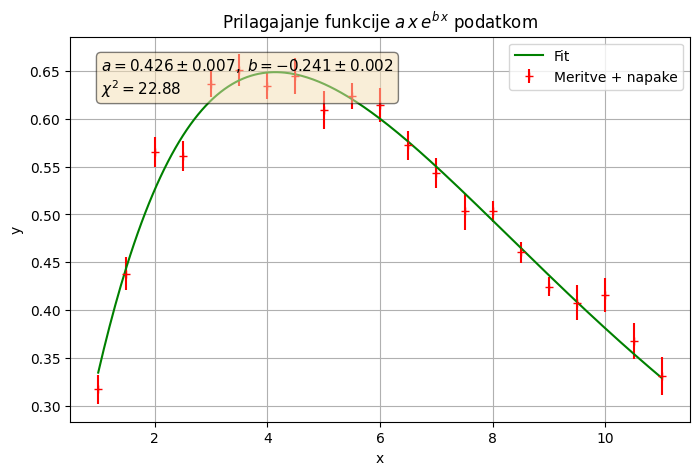

In [ ]:

from scipy.optimize import curve_fit

def model_func(x, a, b):
    return a * x * np.exp(b * x)

def fit_data():
    
    xdata = np.array([1.0, 1.5, 2.0, 2.5, 3.0,
                      3.5, 4.0, 4.5, 5.0, 5.5,
                      6.0, 6.5, 7.0, 7.5, 8.0,
                      8.5, 9.0, 9.5, 10.0, 10.5, 11.0])
    ydata = np.array([0.31700705, 0.43791106, 0.56528271, 0.56102378, 0.63664784,
                      0.65121353, 0.63487502, 0.64501481, 0.60942923, 0.62411336,
                      0.61455575, 0.57226264, 0.54291294, 0.50329224, 0.50314769,
                      0.46050043, 0.42461463, 0.40771586, 0.41605889, 0.36732963, 0.33085992])
    sigma = np.array([0.01548814, 0.01715189, 0.01602763, 0.01544883, 0.01423655,
                      0.01645894, 0.01437587, 0.01891773, 0.01963663, 0.01383442,
                      0.01791725, 0.01528895, 0.01568045, 0.01925597, 0.01071036,
                      0.01087129, 0.01020218, 0.01832620, 0.01778157, 0.01870012, 0.01978618])

    p0 = [0.4, -0.2]

    popt, pcov = curve_fit(model_func, xdata, ydata, p0=p0, sigma=sigma, absolute_sigma=True)
    perr = np.sqrt(np.diag(pcov))  
    
    residuals = (ydata - model_func(xdata, *popt)) / sigma
    chi2 = np.sum(residuals**2)

    print("\n--- PRILAGAJANJE MODELA a*x*exp(b*x) ---")
    print(f"Ocenjeni parametri: a = {popt[0]:.5f} ± {perr[0]:.5f},  b = {popt[1]:.5f} ± {perr[1]:.5f}")
    print(f"Chi^2 = {chi2:.3f},  # točk = {len(xdata)}")

    plt.figure(figsize=(8,5))
    plt.errorbar(xdata, ydata, yerr=sigma, fmt='r+', label='Meritve + napake')
    xfine = np.linspace(min(xdata), max(xdata), 300)
    plt.plot(xfine, model_func(xfine, *popt), 'g-', label='Fit')
    plt.title("Prilagajanje funkcije $a\\,x\\,e^{b\\,x}$ podatkom")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)
    plt.legend()
    
    plt.text(0.05, 0.95,
             (r"$a=%.3f \pm %.3f,\; b=%.3f \pm %.3f$"+"\n"+r"$\chi^2=%.2f$") % 
             (popt[0], perr[0], popt[1], perr[1], chi2),
             transform=plt.gca().transAxes, 
             fontsize=11, verticalalignment='top',
             bbox=dict(boxstyle="round", facecolor="wheat", alpha=0.5))
    #plt.savefig("fit_data.png")

fit_data()


--- Maksimum enojne 2D Gaussove porazdelitve ---
Najden maksimum pri (x, y) = (0.99997, 2.00003)

--- Maksimum dvojne 2D Gaussove porazdelitve (kamelja grba) ---
Najden maksimum pri (x, y) = (1.95751, 1.95753), vrednost = 1.01987


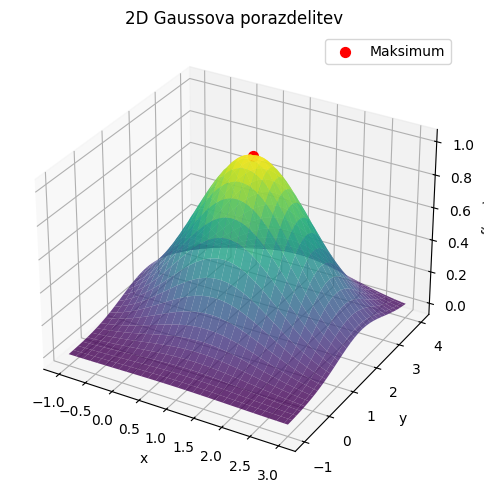

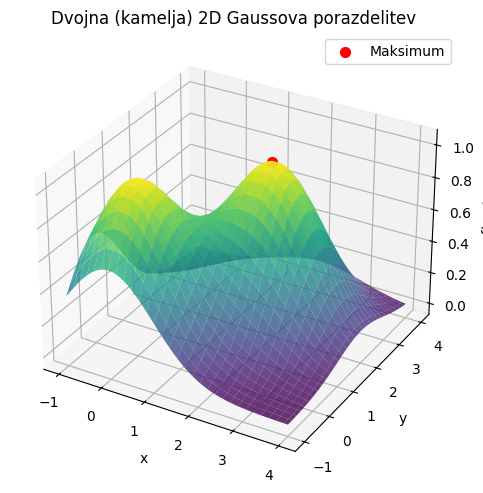

In [ ]:
from scipy.optimize import minimize

def gauss2d(params, x0=1.0, y0=2.0, sigma=1.0):
    x, y = params
    return np.exp(-((x - x0)**2 + (y - y0)**2)/(2*sigma**2))

def double_gauss2d(params, sigma=1.0):
    x, y = params
    g1 = np.exp(-((x - 0)**2 + (y - 0)**2)/(2*sigma**2))
    g2 = np.exp(-((x - 2)**2 + (y - 2)**2)/(2*sigma**2))
    return g1 + g2

def plot_3d_surface(func, xlim, ylim, max_point=None, title=""):
    fig = plt.figure(figsize=(7,5))
    ax = fig.add_subplot(111, projection='3d')
    X = np.linspace(xlim[0], xlim[1], 60)
    Y = np.linspace(ylim[0], ylim[1], 60)
    Xgrid, Ygrid = np.meshgrid(X, Y)
    Zgrid = np.zeros_like(Xgrid)
    for i in range(Zgrid.shape[0]):
        for j in range(Zgrid.shape[1]):
            Zgrid[i,j] = func([Xgrid[i,j], Ygrid[i,j]])
    
    ax.plot_surface(Xgrid, Ygrid, Zgrid, cmap='viridis', alpha=0.8, edgecolor='none')
    if max_point is not None:
        xm, ym = max_point
        zm = func([xm, ym])
        ax.scatter(xm, ym, zm, color='r', s=50, label='Maksimum', depthshade=True)
        ax.legend()
    ax.set_title(title)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('f(x,y)')
    plt.tight_layout()

def maximize_2d_functions():
    
    
    neg_gauss = lambda p: -gauss2d(p)
    res1 = minimize(neg_gauss, x0=[0.0, 0.0], method='Nelder-Mead')
    max1 = res1.x
    print("\n--- Maksimum enojne 2D Gaussove porazdelitve ---")
    print(f"Najden maksimum pri (x, y) = ({max1[0]:.5f}, {max1[1]:.5f})")
    
    plot_3d_surface(
        lambda p: gauss2d(p),
        xlim=(-1, 3), ylim=(-1, 4),
        max_point=max1,
        title="2D Gaussova porazdelitev"
    )

    neg_double_gauss = lambda p: -double_gauss2d(p)
    res2a = minimize(neg_double_gauss, x0=[0.0, 0.0], method='Nelder-Mead')
    res2b = minimize(neg_double_gauss, x0=[2.0, 2.0], method='Nelder-Mead')
    val2a = double_gauss2d(res2a.x)
    val2b = double_gauss2d(res2b.x)
    if val2a >= val2b:
        max2 = res2a.x
        val2 = val2a
    else:
        max2 = res2b.x
        val2 = val2b

    print("\n--- Maksimum dvojne 2D Gaussove porazdelitve (kamelja grba) ---")
    print(f"Najden maksimum pri (x, y) = ({max2[0]:.5f}, {max2[1]:.5f}), vrednost = {val2:.5f}")

    plot_3d_surface(
        lambda p: double_gauss2d(p),
        xlim=(-1, 4), ylim=(-1, 4),
        max_point=max2,
        title="Dvojna (kamelja) 2D Gaussova porazdelitev"
    )

maximize_2d_functions()